In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
s = r"C:\Users\khush\Diwali Sales Analysis Project\Diwali Sales Data.csv"
print(s)

C:\Users\khush\Diwali Sales Analysis Project\Diwali Sales Data.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(s, na_values = ["", "NA"], keep_default_na = False)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
def sonu(df):
    cat = list(df.columns[df.dtypes == "object"])

    for i in df.columns:
        if i in cat:
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)     

In [12]:
sonu(df)

In [13]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [15]:
cat = []
con = []

for k in df.columns:
    if df[k].dtypes == "object":
        cat.append(k)
    else:
        con.append(k)

In [16]:
cat

['Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'State',
 'Zone',
 'Occupation',
 'Product_Category']

In [17]:
con

['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount']

In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
df.groupby(by = ["Gender"]).count()

,User_ID,Cust_name,Product_ID,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
Gender,,,,,,,,,,,,
F,7842,7842,7842,7842,7842,7842,7842,7842,7842,7842,7842,7842
M,3409,3409,3409,3409,3409,3409,3409,3409,3409,3409,3409,3409


In [20]:
df.sort_values(by = ["State"])

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
9002,1004055,Charles,P00242742,F,51-55,54,0,Andhra Pradesh,Southern,Hospitality,Clothing & Apparel,2,5167.0
6416,1001383,Jacobs,P00267542,M,26-35,34,0,Andhra Pradesh,Southern,Chemical,Electronics & Gadgets,2,7834.0
10749,1003292,Dipali,P00085542,M,51-55,52,1,Andhra Pradesh,Southern,Hospitality,Clothing & Apparel,4,2004.0
7947,1000216,Gjertsen,P00252542,F,46-50,46,0,Andhra Pradesh,Southern,IT Sector,Electronics & Gadgets,2,6062.0
1206,1004482,Gillingham,P00150542,M,36-45,43,0,Andhra Pradesh,Southern,Healthcare,Footwear & Shoes,2,16649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1004016,Dowd,P00273742,M,51-55,53,0,Uttarakhand,Central,Healthcare,Footwear & Shoes,1,16386.0
4664,1004029,Sewall,P00111842,M,55+,77,0,Uttarakhand,Central,Govt,Games & Toys,3,9626.0
8076,1003499,Jennifer,P00052042,F,26-35,31,1,Uttarakhand,Central,Construction,Electronics & Gadgets,4,5987.0
7586,1005040,Laalji,P00280442,M,46-50,49,0,Uttarakhand,Central,Textile,Clothing & Apparel,1,6890.0


In [21]:
cat

['Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'State',
 'Zone',
 'Occupation',
 'Product_Category']

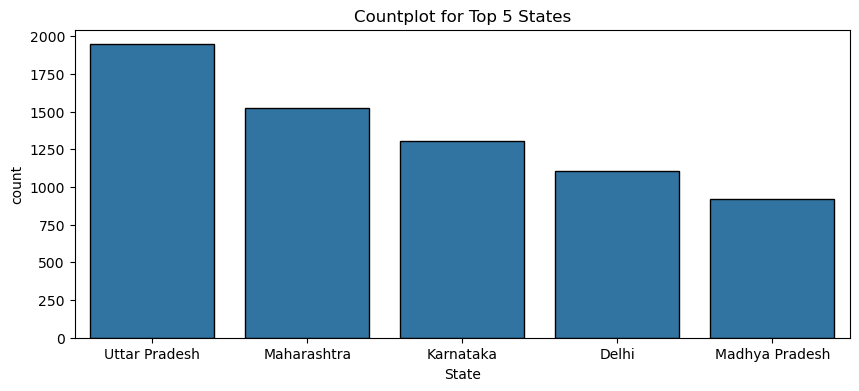

In [22]:
top_states = df["State"].value_counts().nlargest(5).index
filtered_df = df[df["State"].isin(top_states)]

plt.figure(figsize = (10, 4))
sns.countplot(data = filtered_df, x = "State", order = top_states, edgecolor = "black")
plt.title("Countplot for Top 5 States")
plt.show()

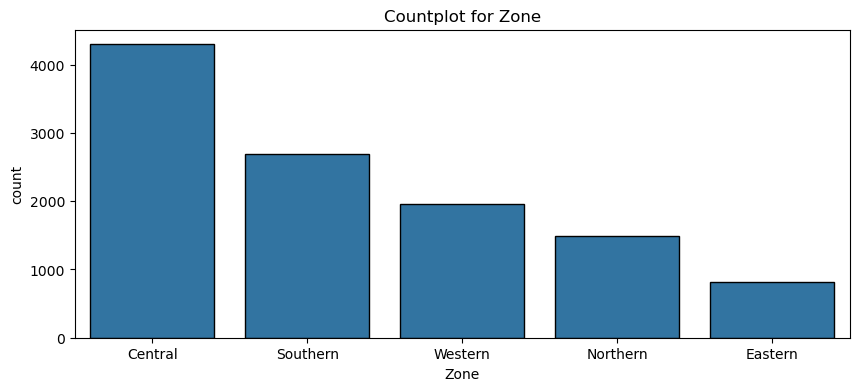

In [23]:
top_zone = df["Zone"].value_counts().nlargest(5).index
filtered_df = df[df["Zone"].isin(top_zone)]

plt.figure(figsize = (10, 4))
sns.countplot(data = filtered_df, x = "Zone", order = top_zone, edgecolor = "black")
plt.title("Countplot for Zone")
plt.show()

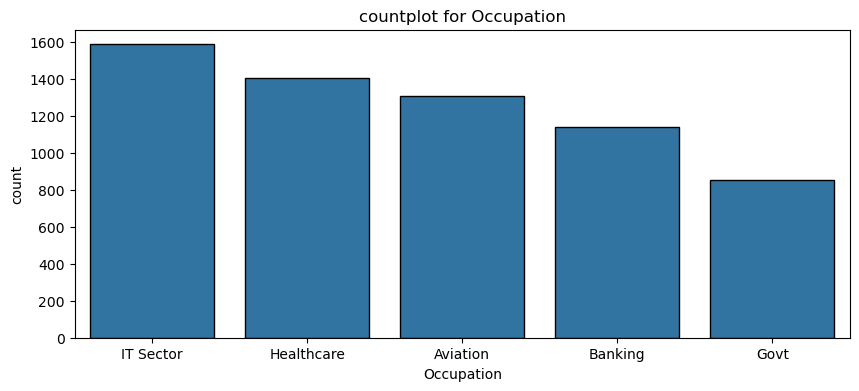

In [24]:
top_occupation = df["Occupation"].value_counts().nlargest(5).index
filtered_df = df[df["Occupation"].isin(top_occupation)]

plt.figure(figsize = (10, 4))
sns.countplot(data = filtered_df, x = "Occupation", order = top_occupation, edgecolor = "black")
plt.title("countplot for Occupation")
plt.show()

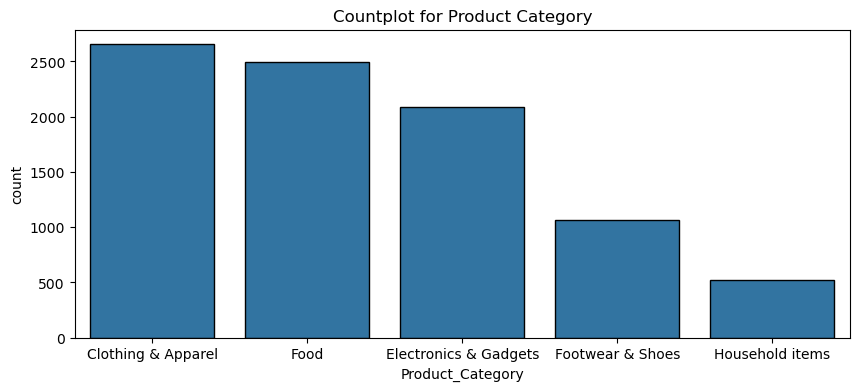

In [25]:
top_product_category = df["Product_Category"].value_counts().nlargest(5).index
filtered_df = df[df["Product_Category"].isin(top_product_category)]

plt.figure(figsize = (10, 4))
sns.countplot(data = filtered_df, x = "Product_Category", order = top_product_category, edgecolor = "black")
plt.title("Countplot for Product Category")
plt.show()

In [26]:
cat

['Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'State',
 'Zone',
 'Occupation',
 'Product_Category']

In [27]:
tab = pd.crosstab(df["State"], df["Cust_name"])
print(tab)

Cust_name         Aaron  Aarushi  Aastha  Aayush  Aayushi  Abelman  Abhijeet  \
State                                                                          
Andhra Pradesh        0        0       3       1        1        1         0   
Bihar                 0        1       1       1        0        0         0   
Delhi                 1        0       5       3        1        1         0   
Gujarat               0        1       0       0        0        2         1   
Haryana               0        0       0       0        1        0         0   
Himachal Pradesh      0        0       1       1        0        0         0   
Jharkhand             0        0       0       2        0        0         0   
Karnataka             1        2       5       1        1        0         1   
Kerala                0        0       4       0        0        1         1   
Madhya Pradesh        0        3       1       2        1        1         0   
Maharashtra           1        0       1

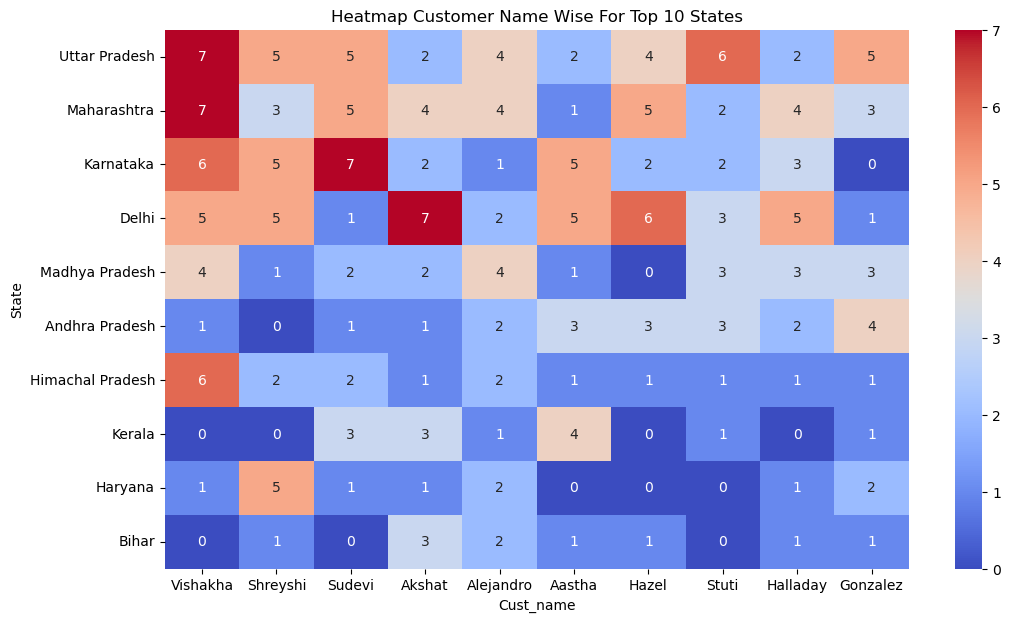

In [28]:
top_state = df["State"].value_counts().nlargest(10).index
top_customers = df["Cust_name"].value_counts().nlargest(10).index
filtered_df = df[df["State"].isin(top_state) & df["Cust_name"].isin(top_customers)]

tab = pd.crosstab(filtered_df["State"], filtered_df["Cust_name"])
tab = tab.reindex(index = top_state, columns = top_customers, fill_value = 0)

plt.figure(figsize = (12, 7))
sns.heatmap(data = tab, annot = True, fmt = "d", cmap = "coolwarm")
plt.title("Heatmap Customer Name Wise For Top 10 States")
plt.show()

In [29]:
con

['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount']

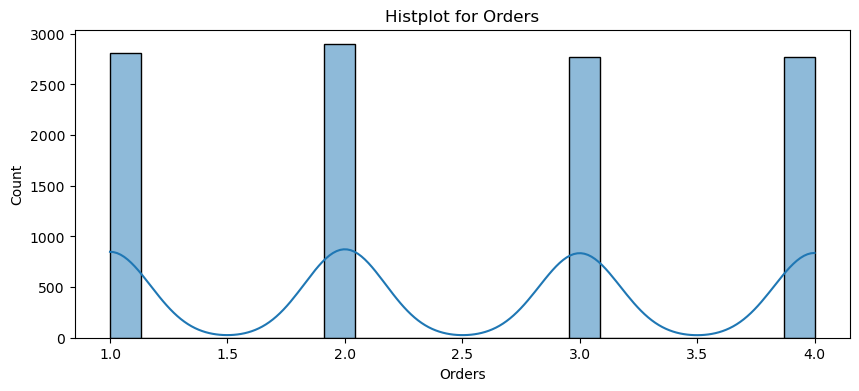

In [30]:
plt.figure(figsize = (10, 4))
sns.histplot(data = df, x = "Orders", kde = True, edgecolor = "black")
plt.title("Histplot for Orders")
plt.show()

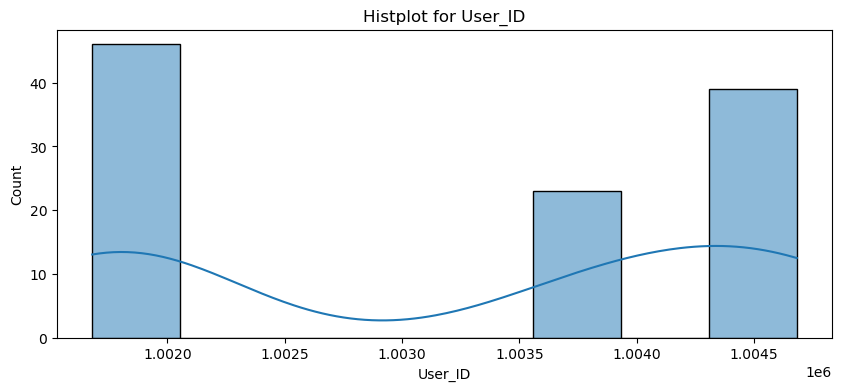

In [31]:
top_user_id = df["User_ID"].value_counts().nlargest(5).index
filtered_df = df[df["User_ID"].isin(top_user_id)]

plt.figure(figsize = (10, 4))
sns.histplot(data = filtered_df, x = "User_ID", kde = True, edgecolor = "black")
plt.title("Histplot for User_ID")
plt.show()

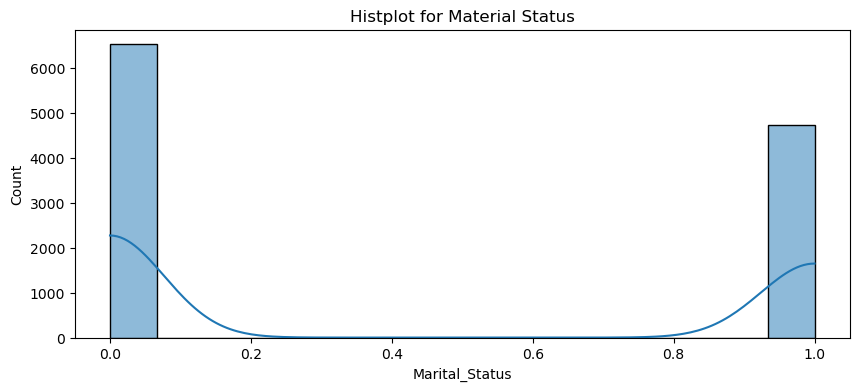

In [32]:
top_marital_status = df["Marital_Status"].value_counts().nlargest(5).index
filtered_df = df[df["Marital_Status"].isin(top_marital_status)]

plt.figure(figsize = (10, 4))
sns.histplot(data = filtered_df, x = "Marital_Status", kde = True, edgecolor = "black")
plt.title("Histplot for Material Status")
plt.show()

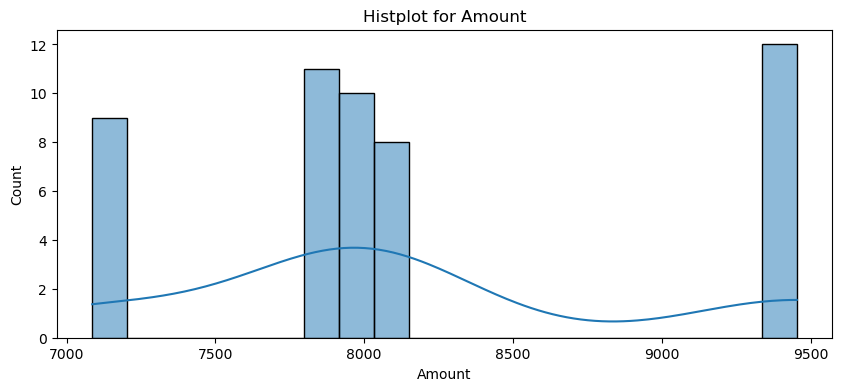

In [33]:
top_amount = df["Amount"].value_counts().nlargest(5).index
filtered_df = df[df["Amount"].isin(top_amount)]

plt.figure(figsize = (10, 4))
sns.histplot(data = filtered_df, x = "Amount", kde = True, edgecolor = "black")
plt.title("Histplot for Amount")
plt.show()

In [34]:
cat

['Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'State',
 'Zone',
 'Occupation',
 'Product_Category']

In [35]:
con

['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount']

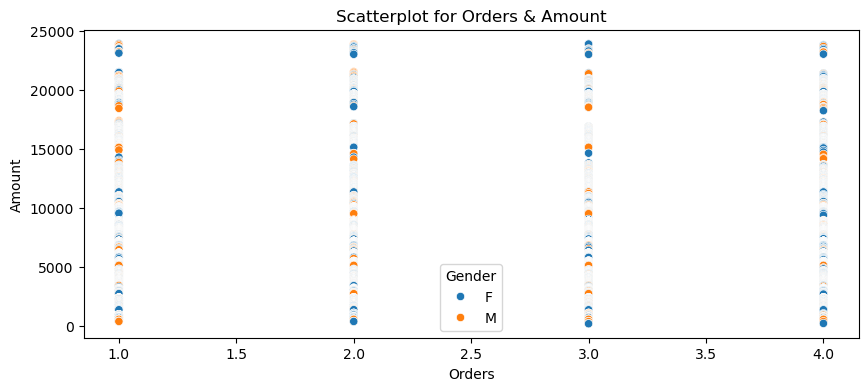

In [36]:
plt.figure(figsize = (10, 4))
sns.scatterplot(data = df, x = "Orders", y = "Amount", hue = "Gender")
plt.title("Scatterplot for Orders & Amount")
plt.show()

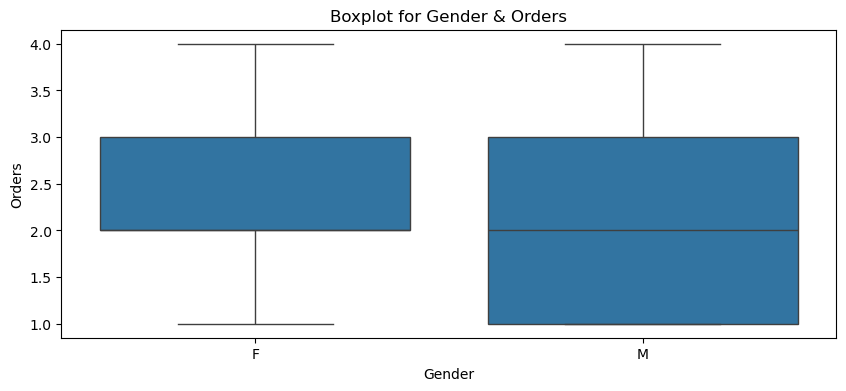

In [37]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = df, x = "Gender", y = "Orders")
plt.title("Boxplot for Gender & Orders")
plt.show()

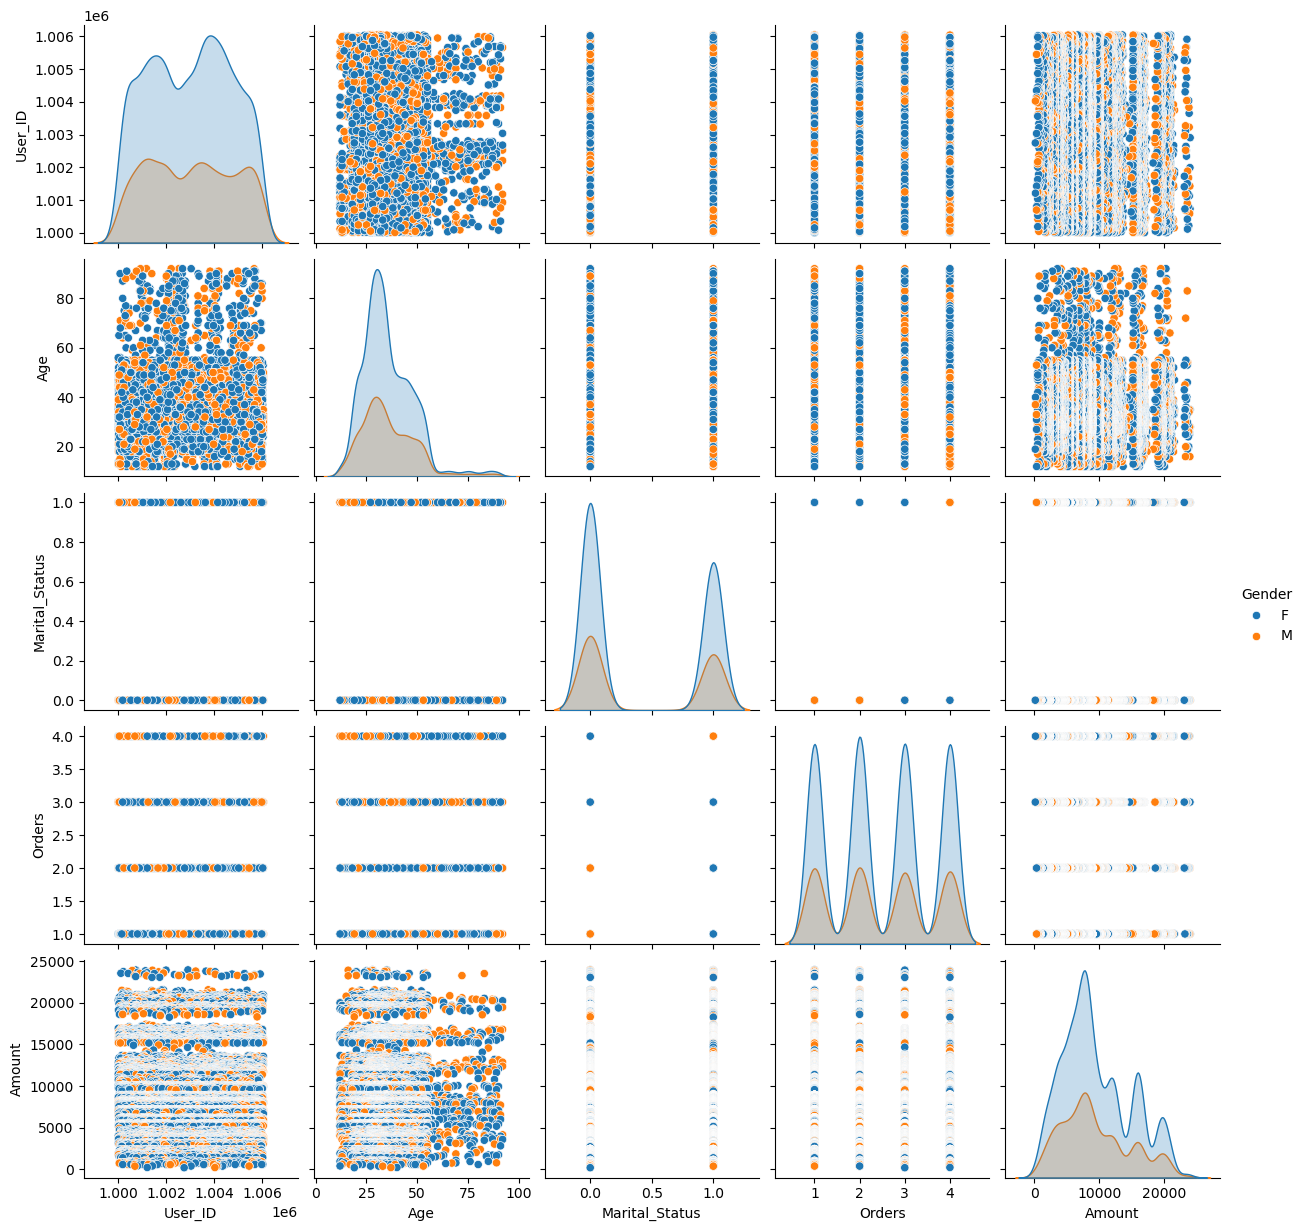

In [38]:
sns.pairplot(data = df, hue = "Gender")

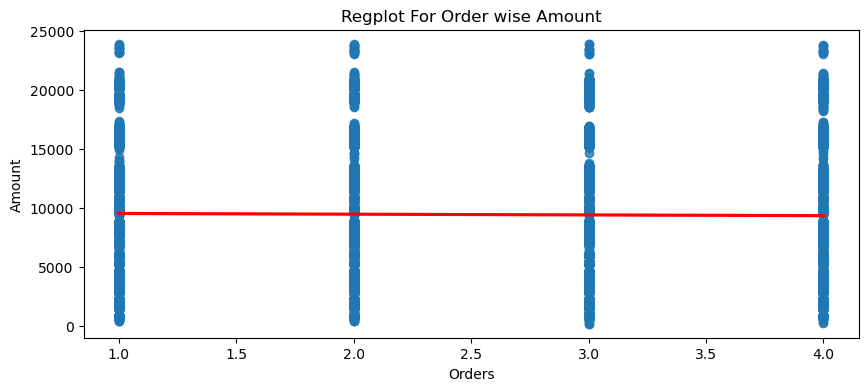

In [39]:
plt.figure(figsize = (10, 4))
sns.regplot(data = df, x = "Orders", y = "Amount", line_kws = {"color":"red"})
plt.title("Regplot For Order wise Amount")
plt.show()

In [40]:
import os
sonu = r"D:\Diwali Sales Data"
os.chdir(sonu)

In [41]:
df.to_csv("Diwali Sales Dataset Clean.csv", index = False)

In [42]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [43]:
from ydata_profiling import ProfileReport

In [44]:
profile = ProfileReport(df, title = "Diwali Sales Report")

In [45]:
import os
s = r"D:\Diwali Sales Data"
os.chdir(s)

In [46]:
profile.to_file("Diwali Sales Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]